Most common hinge scaffolds found by Xing et al.

In [37]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools  

import pandas as pd

In [2]:
scaffolds = []
scaffolds.append(Chem.MolFromSmiles('C1=NC2=C(N1)C(=NC=N2)N'))
scaffolds.append(Chem.MolFromSmiles('C12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=C8N2C7=C53)CNC6=O)N)O'))
scaffolds.append(Chem.MolFromSmiles('C1=C(NN=C1)N'))
scaffolds.append(Chem.MolFromSmiles('C1=CC=NC(=N1)N'))
scaffolds.append(Chem.MolFromSmiles('C1=CC2=C(NC=C2)N=C1'))
scaffolds.append(Chem.MolFromSmiles('C1=CC=C2C(=C1)C=NN2'))
scaffolds.append(Chem.MolFromSmiles('C1=CNC2=C1C(=NC=N2)N'))
scaffolds.append(Chem.MolFromSmiles('C1=C(N=CN=C1N)N'))
scaffolds.append(Chem.MolFromSmiles('C1=CC=NC=C1'))
scaffolds.append(Chem.MolFromSmiles('C1=CNC2=NC=NC=C21'))

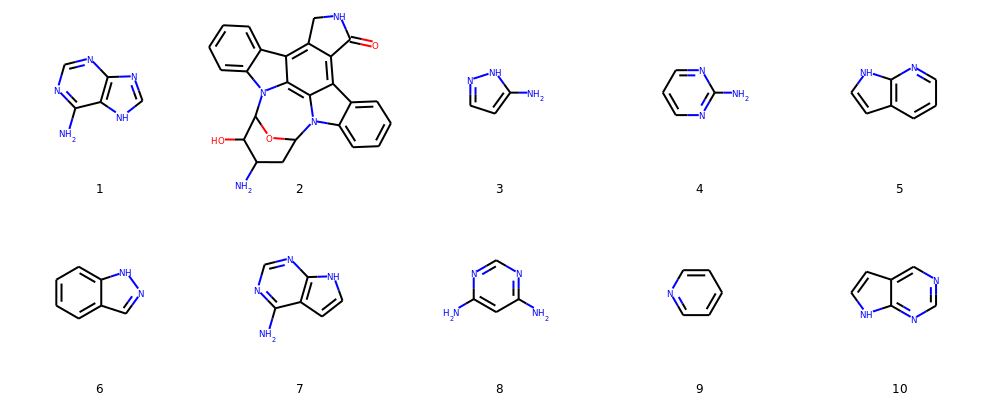

In [3]:
Draw.MolsToGridImage(scaffolds, legends=[str(x+1) for x in range(10)], molsPerRow=5)

In [5]:
adenine = scaffolds[0]
staurosporine = scaffolds[1]

Compare scaffolds to AP fragments:

In [6]:
file = '../FragmentLibrary/AP/AP.sdf' 
suppl = Chem.SDMolSupplier(file, removeHs=False)

In [24]:
AP_smiles = []
for i, frag in enumerate(suppl):
    
    # replace dummy atoms
    du = Chem.MolFromSmiles('*')
    h = Chem.MolFromSmiles('[H]', sanitize=False)
    fixed_frag = AllChem.ReplaceSubstructs(frag, du, h, replaceAll=True)[0]
    fixed_frag = Chem.RemoveHs(fixed_frag)
    # 2D coordinates
    tmp = AllChem.Compute2DCoords(fixed_frag)
    AP_smiles.append(Chem.MolToSmiles(fixed_frag))
    
AP_smiles = pd.Series(AP_smiles)

In [28]:
n_frags = len(AP_smiles)
print('Number of fragments: ', n_frags)

# number of unique fragments
frags_unique = AP_smiles.drop_duplicates()
n_unique = len(frags_unique)
print('Number of unique fragments: ', n_unique)

Number of fragments:  2395
Number of unique fragments:  1117


AP fragments with highest number of occurences:


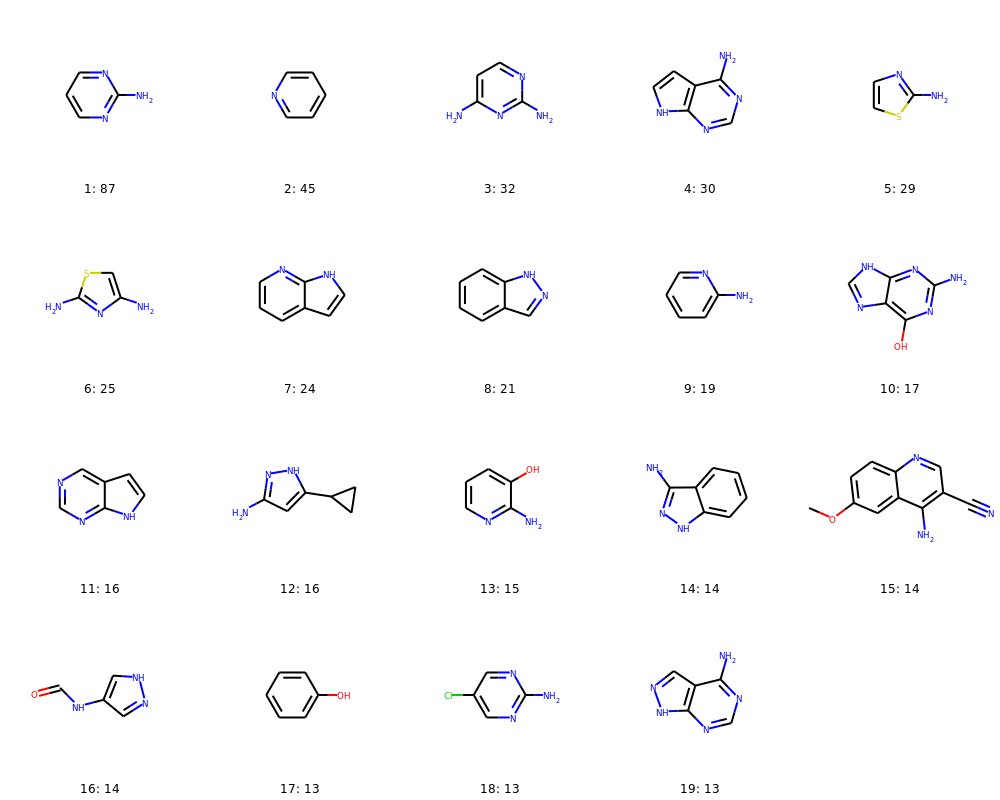

In [64]:
print('AP fragments with highest number of occurences:')

frag_counts = AP_smiles.value_counts()
frags_max = [Chem.MolFromSmiles(smiles) for smiles in frag_counts.index]

numbers = range(50)
Draw.MolsToGridImage(frags_max[:19], legends=[str(i+1)+': '+str(n) for i, n in zip(numbers, frag_counts)], molsPerRow=5)

In [96]:
table = pd.DataFrame(0, index=range(len(scaffolds)), columns=['smiles', 'scaffold rank', 'fragment rank', 'fragment occurrences'])

for s, scaffold in enumerate(scaffolds):
    
    table['smiles'][s] = Chem.MolToSmiles(scaffold)
    table['scaffold rank'][s] = s+1
    
    for f, frag in enumerate(frags_max):
    
         if Chem.MolToSmiles(scaffold) == Chem.MolToSmiles(frag):
            
            occ = frag_counts[f]
            
            test = frag_counts == occ
            test = test.reset_index()
            mols = test[test[0] == True]
            rank = mols.index[0]+1
            
            table['fragment rank'][s] = rank
            table['fragment occurrences'][s] = frag_counts[f]
            
            
PandasTools.AddMoleculeColumnToFrame(table, 'smiles')
table = table.drop('smiles', axis=1)
        

/home/paula/anaconda3/envs/kffl/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/paula/anaconda3/envs/kffl/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/paula/anaconda3/envs/kffl/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/paula/anaconda3/envs/kffl/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCo

,scaffold rank,fragment rank,fragment occurrences,ROMol
0,1,196,2,
1,2,0,0,
2,3,70,5,
3,4,1,87,
4,5,7,24,
5,6,8,21,
6,7,4,30,
7,8,136,3,
8,9,2,45,
9,10,11,16,

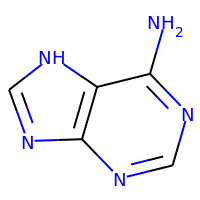
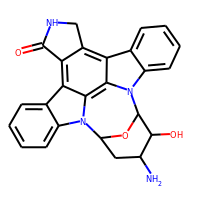
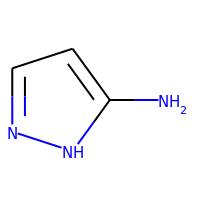
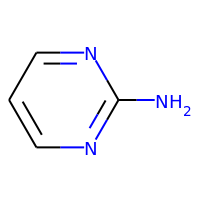
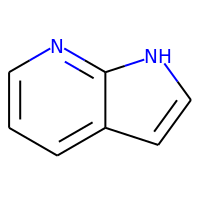
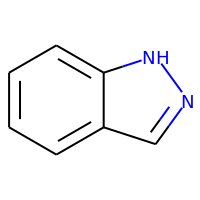
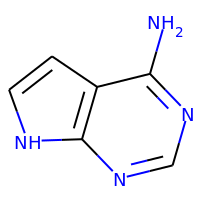
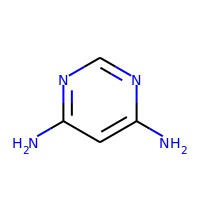
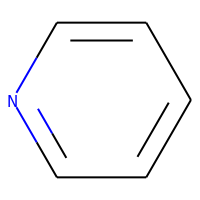
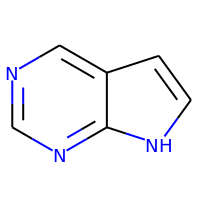

In [97]:
table

In [95]:
test = frag_counts == 7
test = test.reset_index()
mols = test[test[0] == True]
mols.index[0]+1

46